### BH

# DATA ANALYCT PROJECT

#### Presented by: Dan Sayada, Shimon Yaffa and Eithan Lechsayer

### our dataset: franchise500

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
url= r"https://raw.githubusercontent.com/ChadSim/firstPro/main/franchise500.csv"

In [5]:
data=pd.read_csv(url, encoding=' latin-1')
#data.head()


In [6]:
data.columns

Index(['Entreupeneur Profile', '2016 Rank', 'Company', 'Category Detail',
       'Franchise 500 Rank', 'Initial Investment', 'High',
       'Change In Units 1 Yr', 'Change In Units 3 Yr', 'Founded',
       'Franchising Since', 'Corporate Address', 'Ceo', 'Parent Company',
       'About', 'Net Worth Requirement', 'Liquid Cash Requirement',
       'Initial Franchise Fee', 'Financing Options', 'Veteran Incentives',
       'Previous Ranks', 'Highest Rank', 'Lowest Rank',
       'Where Seeking Franchisees', 'Operations'],
      dtype='object')

In [7]:
data['Ceo'].count()

499

In [8]:
text = ' '.join(data['Ceo'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


NameError: name 'WordCloud' is not defined

In [9]:
ceo_column = data['Ceo']
count_names_starting_with_j = ceo_column.str.lower().str.startswith('j').sum()

count_names_starting_with_j


85

In [10]:
count_names_starting_with_a = ceo_column.str.lower().str.startswith('a').sum()

count_names_starting_with_a


25

In [11]:
count_names_starting_with_s = ceo_column.str.lower().str.startswith('s').sum()

count_names_starting_with_s


47

In [12]:
from collections import Counter

all_names = ''.join(data['Ceo'])

letter_counts = Counter(all_names.lower())

most_common_letter, most_common_count = letter_counts.most_common(1)[0]

most_common_letter

'e'

In [13]:
most_common_count


595

###################################################################################
###################################################################################

In [14]:
#url = 'https://raw.githubusercontent.com/ChadSim/firstPro/main/franchise500.csv'
#data = pd.read_csv(url, encoding= 'latin1')

In [15]:
data['Liquid Cash Requirement'] = data['Liquid Cash Requirement'].replace({'\$':''}, regex = True)  
data['Initial Franchise Fee'] = data['Initial Franchise Fee'].replace({'\$':''}, regex = True)  
data['Net Worth Requirement'] = data['Net Worth Requirement'].replace({'\$':''}, regex = True) 
data['Initial Investment'] = data['Initial Investment'].replace({'\$':''}, regex = True) 
data['High'] = data['High'].replace({'\$':''}, regex = True) 
data['Net Worth Requirement'] = data['Net Worth Requirement'].replace({'\$':''}, regex = True)

In [16]:
data[['Percentage1', 'Units1']] = data['Change In Units 1 Yr'].str.extract(r'([+-]?\d*\.\d+|\d+)%\s*([+-]?\d+)\s*UNITS')
data[['Percentage3', 'Units3']] = data['Change In Units 3 Yr'].str.extract(r'([+-]?\d*\.\d+|\d+)%\s*([+-]?\d+)\s*UNITS')

In [18]:
data['Percentage1'] = data['Percentage1'].str.replace('+', '')
data['Units1'] = data['Units1'].str.replace('+', '')
data['Percentage3'] = data['Percentage3'].str.replace('+', '')
data['Units3'] = data['Units3'].str.replace('+', '')

/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_1667/871941720.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Percentage1'] = data['Percentage1'].str.replace('+', '')
/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_1667/871941720.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Units1'] = data['Units1'].str.replace('+', '')
/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_1667/871941720.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Percentage3'] = data['Perc

In [19]:
data.isnull().sum().to_frame('nulls')

,nulls
Entreupeneur Profile,0
2016 Rank,0
Company,0
Category Detail,0
Franchise 500 Rank,0
Initial Investment,0
High,1
Change In Units 1 Yr,134
Change In Units 3 Yr,117
Founded,0


In [20]:
new_data_1yr = data[['Franchise 500 Rank','Company', 'Percentage1', 'Units1', 'Initial Franchise Fee']].dropna().reset_index()
new_data_3yr = data[['Franchise 500 Rank','Company', 'Percentage3', 'Units3', 'Initial Franchise Fee']].dropna().reset_index()


In [21]:
new_data_1yr['Units1'] = new_data_1yr['Units1'].fillna(0).astype(int)
new_data_1yr['Percentage1'] = new_data_1yr['Percentage1'].fillna(0).astype(float)
#new_data_1yr['Initial Franchise Fee'] = data['Initial Franchise Fee'].str.replace(',', '').astype(int)
#new_data_1yr['Initial Franchise Fee'] = new_data_1yr['Initial Franchise Fee'].astype(int)

In [22]:
new_data_1yr['Initial Franchise Fee'].unique()

array(['35,000 ', '75,000 ', '29,500 ', '46,000 ', '15,000 ', '45,000 ',
       '10,000 - 1,000,000', '40,000 - 90,000', '19,000 - 37,500',
       '25,000 ', '25,000 - 35,000', '40,000 ', '25,000 - 59,500',
       '29,950 ', '15,000 - 37,500', '7,500 - 15,000', '2,520 - 44,000',
       '495 - 10,495', '9,630 - 35,700', '20,000 ', '30,000 ',
       '20,000 - 61,900', '6,000 ', '50,000 - 75,000', '4,590 - 32,348',
       '21,500 ', '12,500 ', '19,950 ', '36,500 - 50,500', '495 - 9,800',
       '25,000 - 25,500', '500 - 3,500', '18,500 ', '21,000 - 45,500',
       '55,000 ', '3,000 ', '37,500 ', '49,500 ', '26,900 ', '1,250 ',
       '20,000 - 33,750', '44,500 ', '995 - 46,995', '18,000 - 55,000',
       '40,950 - 64,950', '14,900 ', '15,500 ', '3,975 - 39,750',
       '18,900 ', '25,000 - 400,000', '57,500 ', '35,000 - 70,000',
       '135,000 ', '24,500 ', '48,500 ', '15,000 - 40,000',
       '12,500 - 25,000', '29,500 - 120,000', '15,000 - 35,000',
       '39,900 - 49,900', '70,000 ', 

In [23]:
# solution, we will transform all range values into singular values
def process_franchise_fee(value):
    if '-' in str(value):
        # Handle ranges by calculating the average
        start, end = map(float, value.replace(',', '').split('-'))
        return (start + end) / 2
    else:
        # Keep numeric values as is
        return float(value.replace(',', ''))

# Create a new column 'Processed_Franchise_Fee' based on the custom function
new_data_1yr['Processed_Franchise_Fee'] = new_data_1yr['Initial Franchise Fee'].apply(process_franchise_fee)

# Display the modified DataFrame


In [24]:
new_data_1yr['Processed_Franchise_Fee'] = new_data_1yr['Processed_Franchise_Fee'].astype(int)


In [25]:
# solution, we will transform all range values into singular values
def process_franchise_fee(value):
    if '-' in str(value):
        # Handle ranges by calculating the average
        start, end = map(float, value.replace(',', '').split('-'))
        return (start + end) / 2
    else:
        # Keep numeric values as is
        return float(value.replace(',', ''))

# Create a new column 'Processed_Franchise_Fee' based on the custom function
new_data_3yr['Processed_Franchise_Fee'] = new_data_1yr['Initial Franchise Fee'].apply(process_franchise_fee)

# Display the modified DataFrame
new_data_3yr.head(5)

,index,Franchise 500 Rank,Company,Percentage3,Units3,Initial Franchise Fee,Processed_Franchise_Fee
0,0,#1 Franchise 500,Jimmy John's Sandwiches,22.5,514,"35,000",35000.0
1,1,#2 Franchise 500,Hampton by Hilton,5.7,117,"75,000",75000.0
2,2,#3 Franchise 500,Supercuts,8.8,225,"29,500",29500.0
3,3,#4 Franchise 500,Servpro,4.7,80,"46,000",46000.0
4,4,#5 Franchise 500,Subway,9.4,4149,"15,000",15000.0


In [26]:
new_data_3yr['Units3'] = new_data_3yr['Units3'].fillna(0).astype(int)
new_data_3yr['Percentage3'] = new_data_3yr['Percentage3'].fillna(0).astype(float)

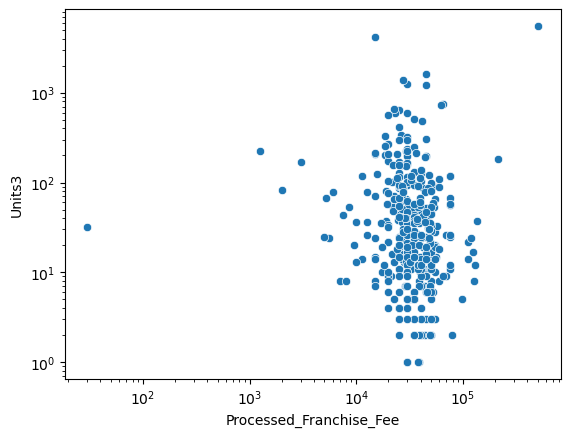

In [27]:
sns.scatterplot(data = new_data_3yr, x = 'Processed_Franchise_Fee', y = 'Units3')

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

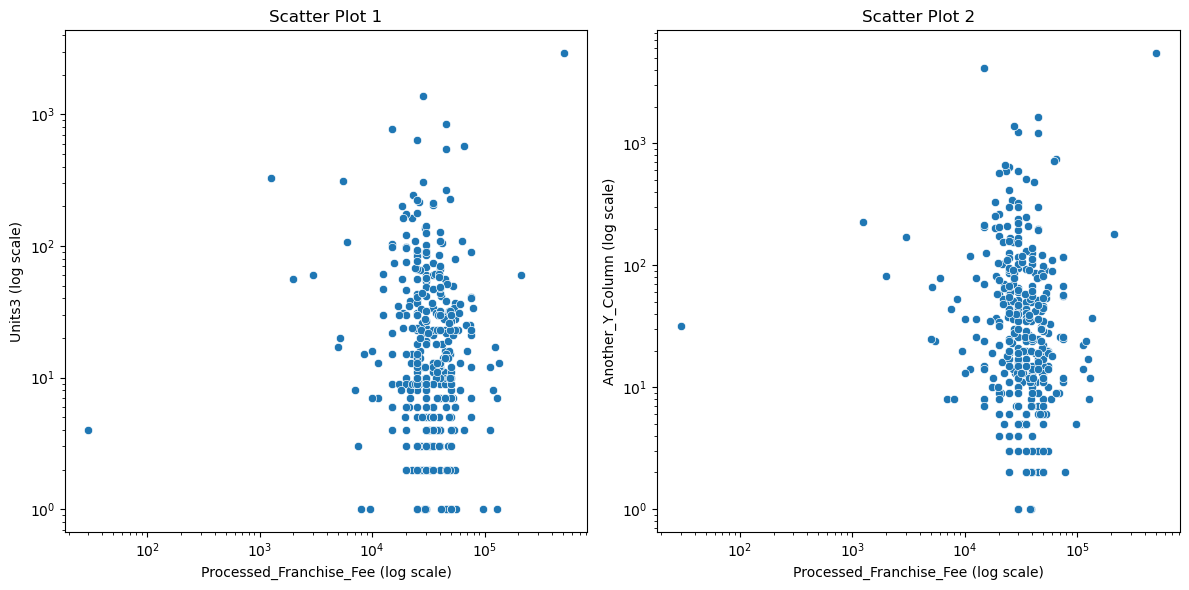

In [28]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1
sns.scatterplot(data=new_data_1yr, x= 'Processed_Franchise_Fee', y='Units1', ax=ax1)
ax1.set_title('Scatter Plot 1')
ax1.set_xlabel('Processed_Franchise_Fee (log scale)')
ax1.set_ylabel('Units3 (log scale)')
ax1.set_xscale('log')
ax1.set_yscale('log')

# Scatter plot 2
sns.scatterplot(data=new_data_3yr, x='Processed_Franchise_Fee', y='Units3', ax=ax2)
ax2.set_title('Scatter Plot 2')
ax2.set_xlabel('Processed_Franchise_Fee (log scale)')
ax2.set_ylabel('Another_Y_Column (log scale)')
ax2.set_xscale('log')
ax2.set_yscale('log')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

##########################################################################################################
##########################################################################################################

In [30]:
data[["Initial Investment"]].fillna(0).head(2)

,Initial Investment
0,"325,500"
1,"4,213,600"


In [31]:
data[["High"]].fillna(0).head(2)

,High
0,"555,000"
1,"14,896,500"


In [32]:
data['Initial Investment'] = data['Initial Investment'].str.replace('$', '')

/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_1667/2817936765.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Initial Investment'] = data['Initial Investment'].str.replace('$', '')


In [33]:
data['High'] = data['High'].str.replace('$', '')

/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_1667/1478808905.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['High'] = data['High'].str.replace('$', '')


In [34]:
data['Initial Investment'] = data['Initial Investment'].str.replace(',', '')
data['High'] = data['High'].str.replace(',', '')

In [35]:
data['Initial Investment'] = data['Initial Investment'].str.replace(',', '').astype(float)


data['High'] = data['High'].str.replace(',', '').astype(float)


data['Initial Investment'] = data['Initial Investment'].fillna(0).astype(int)
data['High'] = data['High'].fillna(0).astype(int)

אין משמעות למינימום ומקסימום

In [63]:
investment = data.groupby('Category Detail')['Initial Investment'].agg(['min', 'max']).sort_values(by='max',ascending=False)
investment

,min,max
Category Detail,,
Upscale hotels and resorts,35493750,55999500
Upscale all-suite hotels,28460000,28460000
Upscale midprice hotels,11669500,11669500
Upscale extended-stay hotels,10899500,10899500
Hotels,102384,7530521
...,...,...
"Windshield repair, glass scratch removal, headlight lens repair",9910,9910
Weekly newspapers distributed at restaurants,9750,9750
Printing and promotional products,4730,4730


In [64]:
data_10_first = investment.head(10)
data_10_first

,min,max
Category Detail,,
Upscale hotels and resorts,35493750,55999500
Upscale all-suite hotels,28460000,28460000
Upscale midprice hotels,11669500,11669500
Upscale extended-stay hotels,10899500,10899500
Hotels,102384,7530521
Midprice extended-stay hotels,7423250,7423250
Limited-service extended-stay lodging,5035000,5035000
Midprice hotels,4213600,4213600
Extended-stay lodging,3656600,3656600


<Figure size 1000x600 with 0 Axes>

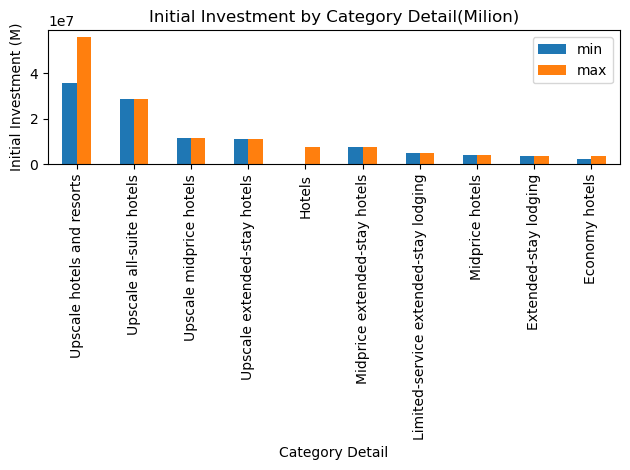

In [65]:
plt.figure(figsize=(10, 6))
data_10_first.plot(kind='bar', y=['min', 'max'])
plt.title('Initial Investment by Category Detail(Milion)')
plt.xlabel('Category Detail')
plt.ylabel('Initial Investment (M)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# we learn that all top highest initial investment are hotels,  possibile of high cost as a result of of expensive realestate and construction cost

In [66]:
data_10_last = investment.tail(10)
data_10_last

,min,max
Category Detail,,
Workplace training and development,19700,19700
Holiday and event lighting,19550,19550
"Commercial, residential and association property management",19400,19400
"Commercial cleaning, facility services",17000,17000
Recreational billiard leagues,16704,16704
"Windshield repair, glass scratch removal, headlight lens repair",9910,9910
Weekly newspapers distributed at restaurants,9750,9750
Printing and promotional products,4730,4730
"Group fitness classes, conventions, apparel and accessories",3530,3530


<Figure size 1000x600 with 0 Axes>

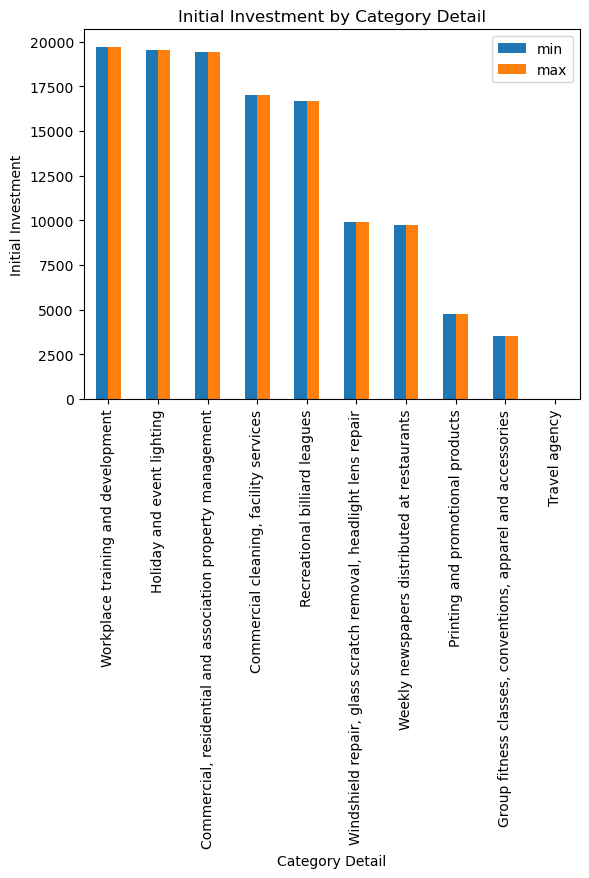

In [67]:
plt.figure(figsize=(10, 6))
data_10_last.plot(kind='bar', y=['min', 'max'])
plt.title('Initial Investment by Category Detail')
plt.xlabel('Category Detail')
plt.ylabel('Initial Investment')
plt.xticks(rotation=90)

plt.show()

התובנה היא: שההשקעה הראשונה היא תלויה הבהמון דברים כגון נדלן מכשור ועוד, לכן כל קטגוריה דורשת סכום שונה
תחום המלונות מונה כמה פריטים ניתן לראות שכל מלון דורש הרבה בהשקעה התחלתית! לעומת זאת תחום התיירות דורש מעט 

In [ ]:
#maybe check for relation of inital investment to inital franchise fee?

###################################################################################################
###################################################################################################

In [68]:
data['Initial Investment'] = data['Initial Investment'].astype(int)
data['High'] = data['High'].astype(int)

In [69]:
data['Division'] = data['High'] / data['Initial Investment']

In [70]:
#data.head()

In [71]:
data_10_big=data['Division'].nlargest(10).index

data_10_big = data.loc[data_10_big]
#data_10_big

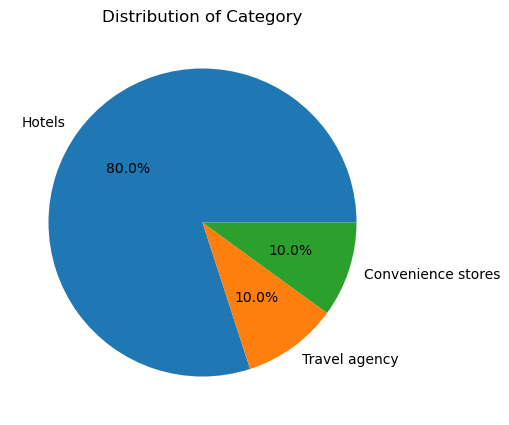

In [72]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Category")
data_10_big['Category Detail'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")  
plt.show()

##########################################################################################
##########################################################################################

In [ ]:
sns.scatterplot(x=data['Company'],y=data['Division'])
plt.xscale('log')
plt.yscale('log')

##############################################################################
##############################################################################